# Step 0: Import data (Megan)

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import pyarrow
import chart_studio.plotly as py
import plotly.graph_objs as go
import chart_studio
import plotly.express as px
from datetime import datetime
from scipy.spatial import distance_matrix
from sklearn.metrics import pairwise_distances

In [2]:
#Note - You can download the tracks_features.csv file from the below URL
##Download this file from the URL https://www.kaggle.com/rodolfofigueroa/spotify-12m-songs/

df_full = pd.read_csv("../FlaskAPI/data/tracks_features.csv") 

In [3]:
df_full['explicit'] = df_full['explicit'].astype('int')
df_full.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,0,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,1,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,0,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,1,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,0,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [4]:
# print(df_full.columns)

In [5]:
df = df_full[['explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
df = pd.DataFrame(MinMaxScaler().fit_transform(df)) # scale data
df = pd.DataFrame(StandardScaler().fit_transform(df)) # standardize data
display(df.tail())
df.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12
1204020,-0.271482,-1.207662,1.548995,-0.054896,0.693013,-1.429603,-0.148133,-1.135513,-0.745767,0.750312,-0.048012,1.356033,0.298487
1204021,-0.271482,1.597219,0.649726,1.641587,0.745719,-1.429603,0.033777,-0.889797,0.959752,-0.702095,1.305115,0.140468,0.298487
1204022,-0.271482,1.539223,0.972105,1.076093,0.837668,-1.429603,-0.241244,-1.080866,1.687925,-0.749197,0.144235,0.140985,0.298487
1204023,-0.271482,0.906543,1.175714,0.227851,0.719079,-1.429603,-0.374875,-1.159605,1.310550,-0.468801,-0.743062,0.237633,0.298487
1204024,-0.271482,1.280879,0.673480,-0.903137,0.362311,-1.429603,-0.262797,-1.116173,0.034919,0.428910,-0.828094,0.011528,0.298487


(1204025, 13)

# Step 1: Generate the seed data for each activity (Megan)

In [6]:
activities = ["driving", "cooking", "studying", "working out", "cleaning", "being creative"]

In [8]:
# import seed songs
seeds = pd.read_csv("../FlaskAPI/data/SeedData.csv")
seeds['Activity'] = seeds['Activity'].str.lower()
seeds.head()

,Activity,Rank,Track ID,Track Name
0,driving,1,3bgxOL5l0KCm9G78tPqRIm,Hit the Road Jack
1,driving,2,0XOLoIWDu0q8O77ZTFwuP6,Life Is A Highway
2,driving,3,1UeAfUknKzpNPnwznf5iG6,Home
3,driving,4,7yYBRotoVRGvOL05dAS6vy,Lucy In the Sky With Diamonds
4,driving,5,7vK5XIuj2sglBRFFN4KR43,Paradise


In [9]:
merge = pd.merge(df_full, seeds, left_on = 'id', right_on = 'Track ID', how = 'left')
merge = merge[merge['Activity'].notna()]
merge = merge.sort_values(by='Activity', ascending=True)
merge.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,valence,tempo,duration_ms,time_signature,year,release_date,Activity,Rank,Track ID,Track Name
480708,23NPGXlSaIqWzvxIRhM2oG,Under the Bridge,Greatest Hits,53tvjWbVNZKd3CvpENkzOC,['Red Hot Chili Peppers'],['0L8ExT028jH3ddEcZwqJJ5'],1,1,0,0.554,...,0.513,84.275,265507,4.0,2003,2003-11-18,being creative,6.0,23NPGXlSaIqWzvxIRhM2oG,Under the Bridge
45310,0shK5iZQppbHPQYiy60xs9,Rosa Parks,Aquemini,5ceB3rxgXqIRpsOvVzTG28,['OutKast'],['1G9G7WwrXka3Z1r7aIDjI7'],3,1,1,0.792,...,0.251,103.890,324373,4.0,1998,1998-09-29,being creative,2.0,0shK5iZQppbHPQYiy60xs9,Rosa Parks
502354,6L89mwZXSOwYl76YXfX13s,Basket Case,Dookie,4uG8q3GPuWHQlRbswMIRS6,['Green Day'],['7oPftvlwr6VrsViSDV7fJY'],7,1,0,0.442,...,0.781,85.064,181533,4.0,1994,1994-02-01,being creative,3.0,6L89mwZXSOwYl76YXfX13s,Basket Case
534994,6QewNVIDKdSl8Y3ycuHIei,Even Flow,Ten,5B4PYA7wNN4WdEXdIJu58a,['Pearl Jam'],['1w5Kfo2jwwIPruYS2UWh56'],2,1,0,0.394,...,0.265,105.338,292581,4.0,1991,1991-08-27,being creative,7.0,6QewNVIDKdSl8Y3ycuHIei,Even Flow
704945,5OQsiBsky2k2kDKy2bX2eT,Learn to Fly,There Is Nothing Left To Lose,28q2N44ocJECgf8sbHEDfY,['Foo Fighters'],['7jy3rLJdDQY21OgRLCZ9sD'],3,1,0,0.465,...,0.537,135.997,235293,4.0,1999,1999-11-02,being creative,5.0,5OQsiBsky2k2kDKy2bX2eT,Learn to Fly


In [10]:
# generate dummy indices for each activity
seed_songs = {}
for a in activities:
    seed_songs[a] = list(merge[merge['Activity'] == a].index)
print(seed_songs)

{'driving': [238229, 281, 22569, 7193, 10170, 41974, 21325, 22549, 159281, 25879], 'cooking': [470755, 364081, 6448, 311, 348542, 613320, 268345, 90163, 986683, 148472], 'studying': [1022, 5511, 17749, 155638, 27176, 29872, 378380, 49363, 76923, 184899], 'working out': [489571, 546037, 554960, 580214, 700186, 298920, 9021, 144706, 489564, 1010250], 'cleaning': [121238, 99648, 89910, 68537, 465682, 42745, 2257, 646528, 3427, 10018], 'being creative': [480708, 45310, 502354, 534994, 704945, 835952, 865131, 161990, 894544, 904635]}


In [11]:
# generate dataframes for each activity
seed_df = {}
for a in activities:
    seed_df[a] = df.loc[seed_songs[a]]
seed_df['driving']

,0,1,2,3,4,5,6,7,8,9,10,11,12
238229,-0.271482,1.064713,-0.008607,-1.468631,0.398260,0.699495,0.789868,-0.238190,-0.751720,0.622860,0.739464,-0.407323,0.298487
281,-0.271482,0.062970,0.439331,-0.903137,0.703468,0.699495,-0.494711,-1.016484,-0.751720,-0.485425,-0.073892,1.043301,0.298487
22569,-0.271482,-0.574982,0.147493,0.510599,0.575856,0.699495,-0.486090,0.244674,0.569090,0.140756,0.262541,-0.768443,0.298487
7193,-0.271482,-0.400995,0.327347,-1.185884,0.545493,0.699495,-0.414533,-1.022455,1.528471,-0.341348,-0.007345,-0.981069,0.298487
10170,-0.271482,0.838003,1.308059,-1.185884,0.929617,0.699495,-0.338665,-1.044781,-0.750974,-0.036570,0.724675,0.845028,0.298487
41974,-0.271482,1.607764,-0.602464,0.510599,0.139456,0.699495,-0.274867,0.099296,1.204248,-0.529757,-0.691303,1.362951,-1.483465
21325,-0.271482,-0.211191,1.341993,-0.337643,1.070118,-1.429603,-0.287799,-1.159321,-0.638242,-0.236061,1.264448,1.157566,0.298487
22549,-0.271482,0.263319,1.450584,-0.903137,1.113515,0.699495,0.203617,-1.137902,-0.751672,0.229418,1.460392,1.789300,0.298487
159281,-0.271482,-0.184830,1.406469,1.076093,0.902977,-1.429603,1.858913,-0.617213,-0.751720,-0.136316,0.107264,-0.255175,0.298487
25879,-0.271482,0.305497,-0.314019,0.510599,0.604358,0.699495,-0.281764,0.686002,-0.751720,0.467700,0.510245,0.959712,0.298487


### Transform and append seed songs

In [12]:
def pca_seed(a_df): # PCA a dataframe into a single data point
    pca = PCA(n_components = 1)
    pca.fit(a_df.T)
    pca_trans = pca.transform(a_df.T)
    a_pca = pd.DataFrame(pca_trans.T)
    return a_pca

In [13]:
def combine_seeds(seed_df, df = df): # take a dict of songs dataframe, transform, and return a dataframe of seed data
    seed_pca = pd.DataFrame()
    for a in activities:
        a_pca = pca_seed(seed_df[a])
        seed_pca = seed_pca.append(a_pca) # dataframe of new seed data
    return seed_pca

In [14]:
seed_pca = combine_seeds(seed_df, df)

In [15]:
seed_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.899576,-0.170372,-2.264488,2.112365,-1.789839,0.202805,0.103610,2.574260,2.079361,0.298733,-1.726516,-1.734874,-0.584620
0,3.005937,-0.960199,-2.099469,1.514449,-1.137977,0.427024,0.665274,2.924614,1.870626,-2.646564,-2.228604,-0.521602,-0.813509
0,1.175867,-1.569155,-1.325203,1.058988,-1.630559,-1.084936,0.948081,2.778458,2.869793,-1.067841,-2.074519,-0.030617,-0.048357
0,1.472987,-3.857209,-2.680049,1.129859,-1.692491,0.720240,0.030597,3.982278,2.699683,1.421422,-3.513382,0.575077,-0.289011
0,-0.909266,1.637961,2.726940,-2.128410,2.405593,-0.534253,-0.223907,-3.020327,-2.061812,-1.344837,3.239575,-0.362469,0.575214
0,-2.362765,-0.939718,-2.156542,0.337582,-1.940868,2.077316,0.146654,3.660822,2.982025,-3.084524,-0.620327,1.896545,0.003798


In [16]:
def append_seeds(seed_pca, df = df): # append seed data to the large df
    df = df.append(seed_pca, ignore_index = True)
    seed_ind = {}
    indices = df.tail(len(activities)).index
    for a, i in zip(activities, indices): # map seed data index with activity
        seed_ind[a] = i
    return df, seed_ind

In [17]:
df, seed_ind = append_seeds(seed_pca, df)

In [18]:
print(df.shape)
print(seed_ind)

(1204031, 13)
{'driving': 1204025, 'cooking': 1204026, 'studying': 1204027, 'working out': 1204028, 'cleaning': 1204029, 'being creative': 1204030}


In [19]:
n = df.shape[0]

# Step 2: Perform k-means clustering on the entire dataset (Megan)

### 1. PCA transform the dataset

In [20]:
def pca_to_dim(dim, colnames = [], df = df):
    pca = PCA(n_components = dim)
    pca.fit(df)
    pca_trans = pca.transform(df)
    if len(colnames) > 0:
        return pd.DataFrame(pca_trans, columns = colnames)
    return pd.DataFrame(pca_trans)

In [21]:
df_pca = pca_to_dim(4)
df_pca.head()

,0,1,2,3
0,-1.962897,-0.751330,0.676106,0.588522
1,-2.732252,2.157392,0.772835,-0.418966
2,-2.066005,0.783677,1.302902,0.764865
3,-2.444212,2.624898,1.650876,-1.609083
4,-1.554366,-1.212605,-0.245503,0.805364


### 2. Optimize number of segments

*Method 1: Elbow method*

For each of the K values, calculate average distances to the centroid across all data points, i.e. inertia. Find the value of k, i.e. number of segments, where the average distance from the centroid falls suddenly.

In [22]:
ssdist = []
K = range(2, 11)
# random.seed(seed)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_pca)
    ssdist.append(kmeans.inertia_)

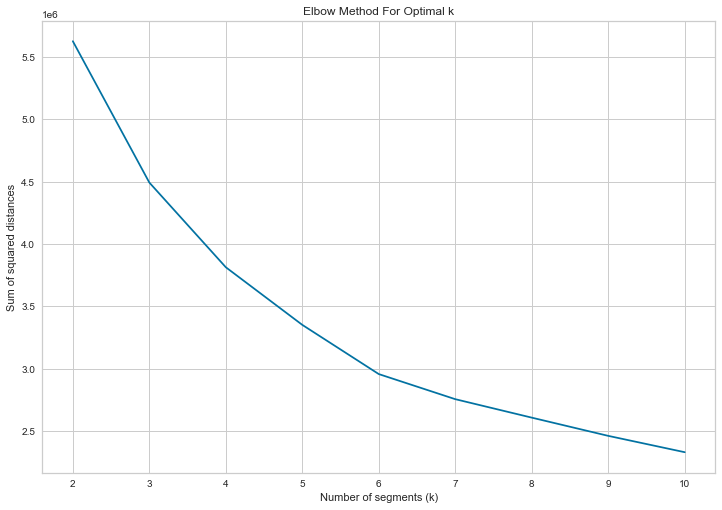

In [23]:
plt.figure(figsize=(10,7))
plt.plot(K, ssdist)
plt.tight_layout()
plt.xlabel('Number of segments (k)') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal k')
plt.show()

A significant decline is observed at k = 6.

*Method 2: Silhouette analysis*

Silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

Coefficient = 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

In [24]:
silhouette_avg = []
K = range(2, 11)
# random.seed(seed)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_pca, cluster_labels, 
                                           sample_size=np.int(n*0.01), n_jobs=-1))

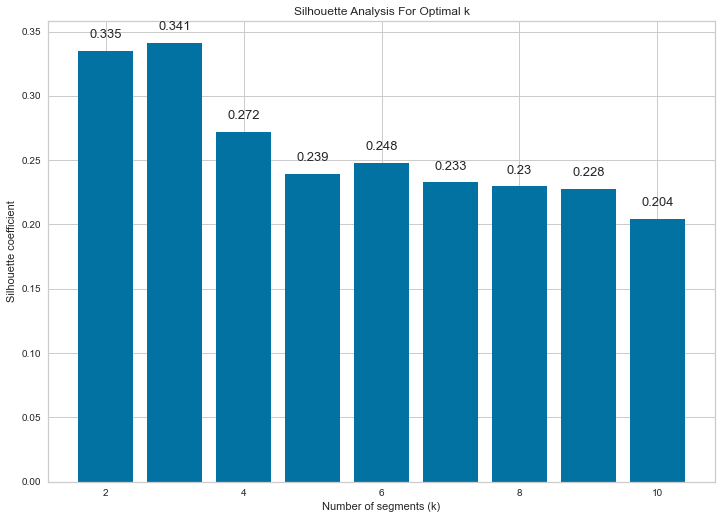

In [25]:
fig, ax = plt.subplots(figsize = (10,7))
ax.bar(K, silhouette_avg)
for index, data in zip(K, silhouette_avg):
    plt.text(x = index, y = data+0.01, s=f"{np.round(data,3)}" , fontdict=dict(fontsize=13), ha='center')
plt.tight_layout()
plt.xlabel('Number of segments (k)') 
plt.ylabel('Silhouette coefficient') 
plt.title('Silhouette Analysis For Optimal k')
plt.show()

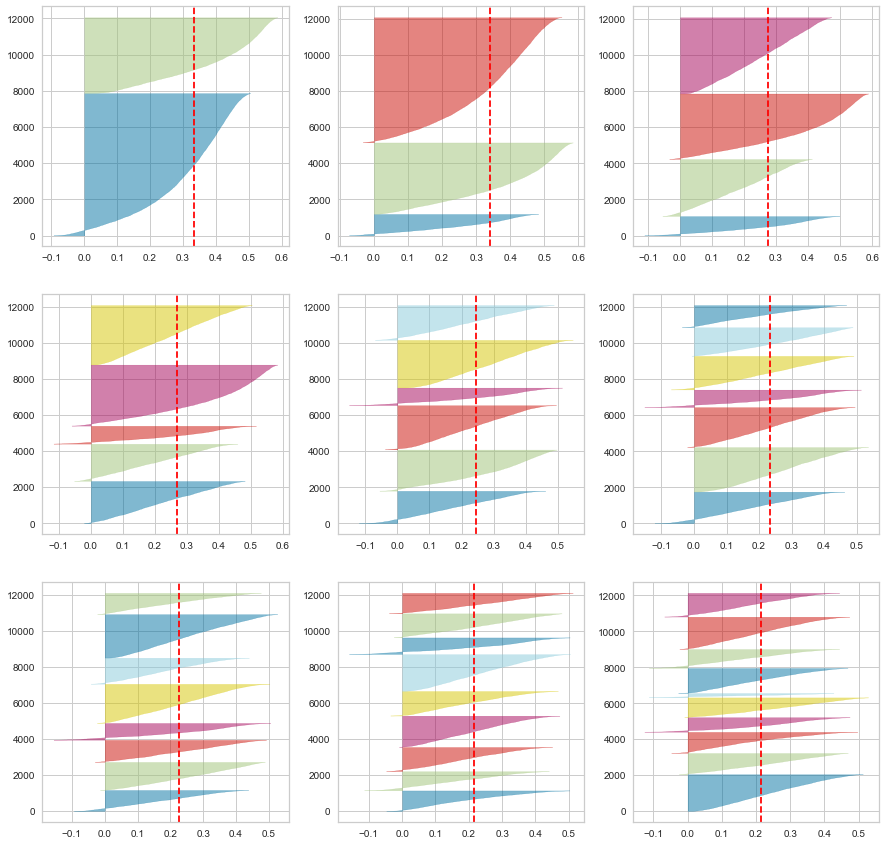

In [26]:
sample = df_pca.sample(n=np.int(n*0.01))
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i,num_clusters in enumerate(K):
    kmeans = KMeans(n_clusters=num_clusters)
    x = np.int((i)/3)
    q, y = divmod(i, 3)
#     silhouette_visualizer(kmeans, sample, colors='yellowbrick', ax=ax[x][y])
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[x][y])
    visualizer.fit(sample)

The value of k = 6 seems to be optimal for the given data due to the following reasons:
* Presence of clusters with above average silhouette scores 
* Minimal fluctuations in the size of the silhouette plots

Also, k = 6 yields the 4th highest silhouette coefficient among all.

*Conclusion*

k = 6 is the optimal number of clusters balancing between the conditions of the SS distances and the silhouette coefficients.

### 3. Create model and return clustering labels

In [27]:
kmeans = KMeans(n_clusters=6, random_state=123)
kmeans.fit(df_pca)
clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])

In [28]:
clusters.head()

,Cluster
0,1
1,3
2,1
3,3
4,5


In [29]:
clusters.tail(len(activities))

,Cluster
1204025,4
1204026,4
1204027,4
1204028,4
1204029,5
1204030,4


*Plot clusters in 2D*

In [30]:
df_2d = pca_to_dim(2, ['x','y'])
df_2d['cluster'] = kmeans.labels_[df_2d.index]
df_2d.head()

,x,y,cluster
0,-1.962897,-0.751326,1
1,-2.732252,2.157397,3
2,-2.066005,0.783678,1
3,-2.444212,2.624901,3
4,-1.554366,-1.212603,5


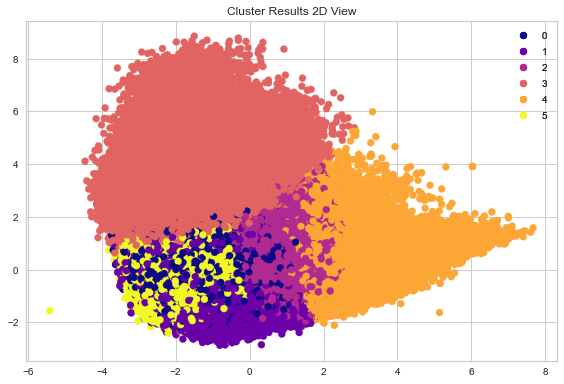

In [31]:
fig, ax = plt.subplots()
scatter = ax.scatter(df_2d['x'], df_2d['y'], c=df_2d['cluster'], cmap='plasma')
legend = ax.legend(*scatter.legend_elements(), loc="upper right")
ax.add_artist(legend)
ax.title.set_text('Cluster Results 2D View')
plt.tight_layout()
plt.show()

*Plot clusters in 3D*

In [54]:
#%env var PLOTLY_USERNAME <Put your user name here>
#%env var PLOTLY_APIKEY <Put your API key here>

In [37]:
#You will need a plotly account to generate the API Key 
#Follow instructions in link below 
#https://community.plotly.com/t/how-could-i-get-my-api-key/3088

PLOTLY_USERNAME = %env PLOTLY_USERNAME
PLOTLY_APIKEY = %env PLOTLY_APIKEY

chart_studio.tools.set_credentials_file(username = PLOTLY_USERNAME, api_key = PLOTLY_APIKEY)

In [39]:
df_3d = pca_to_dim(3, ['x','y','z'])
df_3d['cluster'] = kmeans.labels_[df_3d.index]
df_3d.head()

,x,y,z,cluster
0,-1.962897,-0.751330,0.676106,1
1,-2.732252,2.157392,0.772835,3
2,-2.066005,0.783677,1.302902,1
3,-2.444212,2.624898,1.650876,3
4,-1.554366,-1.212605,-0.245503,5


In [40]:
# df_3d = df_3d.sample(n=np.int(n*0.01))
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
# scatter = ax.scatter3D(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['cluster'], cmap='plasma')
# legend = ax.legend(*scatter.legend_elements(), loc="upper right")
# ax.add_artist(legend)
# plt.show()

In [41]:
df_3d = df_3d.sample(n=np.int(n*0.005))
trace = go.Scatter3d(
    x = df_3d['x'],
    y = df_3d['y'],
    z = df_3d['z'],
    text = ["Index " + str(i) for i in df_3d.index],
    mode = 'markers',
    marker = dict(
        size = 4,
        color = df_3d['cluster'],
#         colorscale = 'viridis',  # https://plotly.com/python/builtin-colorscales/
        opacity = 0.8
    )
)
my_data = [trace]

In [42]:
my_layout = go.Layout(
    title = 'Cluster Results 3D View',
#     showlegend = True,
    scene = dict(
        xaxis = dict(title = 'x'),
        yaxis = dict(title = 'y'),
        zaxis = dict(title = 'z')
    )
)

In [43]:
fig = go.Figure(data=my_data, layout=my_layout)
# fig.update_traces(showlegend=False)
py.iplot(fig, filename='plotly_live_3D')

# Step 3: Prioritize songs in a selected cluster by additional criteria (KK)


### After Step#2, 
**What we know**

* Index of songs and the cluster to which each song belongs to
* Song metadata like name can be obtained looking up index against input dataset
* Activities and the corresponding seed songs and its corresponding index

**What is input from the UI screen**
* Activity
* Explicit Yes or No
* Year of birth 
* Number of songs to be retrieved

**What is output**
* Top x songs as input from the cluster closely resembling the input


Now that we know which cluster each song belongs to, the below steps will prep the data to be made available to the Flask API which the song UI invokes. 

### Inspect the clusters dataframe which has the cluster assignments from Step2

In [44]:
#clusters dataframe has the cluster assignment for each song using its index in teh input data file
clusters.head()

,Cluster
0,1
1,3
2,1
3,3
4,5


### Append the cluster to the original dataset so that we can lookup song by cluster

In [45]:
#clusters.groupby(['Cluster']).size()
songswithcluster = pd.merge(df_full, clusters,left_index=True,right_index=True)
songswithcluster.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,Cluster
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,0,0.470,...,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02,1
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,1,0.599,...,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02,3
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,0,0.315,...,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02,1
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,1,0.440,...,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02,3
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,0,0.426,...,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02,5


### Check the distribution of rows across clusters to ensure a fairly even split

In [46]:
clusters.groupby(['Cluster']).size()

Cluster
0    187521
1    179148
2    245531
3     97550
4    230729
5    263552
dtype: int64

### Inspect the seed_ind dataset which has the index for each of the seed songs

In [47]:
# The below dictionary has the row index for each of the seed activities
seed_ind

{'driving': 1204025,
 'cooking': 1204026,
 'studying': 1204027,
 'working out': 1204028,
 'cleaning': 1204029,
 'being creative': 1204030}

### For each of the seed songs, identify its index on the updated dataframe from Step1. Write the data points to a dataframe. 

In [48]:
seedInfo = {'Activity':[],'Index':[],'Cluster':[]}
for i in seed_ind:
    seedInfo['Activity'] += [i]
    seedInfo['Index'] += [seed_ind[i]]
    seedInfo['Cluster'] += [clusters.iloc[seed_ind[i]]['Cluster']]

seedInfoDF = pd.DataFrame(seedInfo)

seedInfoDF

,Activity,Index,Cluster
0,driving,1204025,4
1,cooking,1204026,4
2,studying,1204027,4
3,working out,1204028,4
4,cleaning,1204029,5
5,being creative,1204030,4


### Write the seed info dataframe into a parquet file so that it can be read by the Flask API. This data will be read by the Flask API to identify which cluster the seed song belongs to

In [49]:
seedInfoDF.to_parquet('../FlaskAPI/data/seedInfo.parquet')

### Filter the songswithcluster dataframe to only the fields we need for song selection. Write this dataframe to a parquet file to be used by the Flaks API

In [50]:
songswithcluster_trimmed = songswithcluster[['name', 'album', 'artists','year','Cluster','release_date','explicit']]

songswithcluster_trimmed.to_parquet('../FlaskAPI/data/clusters_trimmed.parquet')

songswithcluster_trimmed.head()

,name,album,artists,year,Cluster,release_date,explicit
0,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],1999,1,1999-11-02,0
1,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],1999,3,1999-11-02,1
2,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],1999,1,1999-11-02,0
3,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],1999,3,1999-11-02,1
4,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],1999,5,1999-11-02,0


### Write all the accepted activities list to an output file so that the FlaskAPI can use this file to perform validation on API Calls from the UI. An error will be thrown if an activity is passed to the REST API which is not available on this list

In [51]:
acceptedActivities = pd.DataFrame(activities,columns=['activity'])
acceptedActivities.to_parquet('../FlaskAPI/data/acceptedActivities.parquet')

# if (pd.read_parquet('../FlaskAPI/data/acceptedActivities.parquet')['activity'][0] == 'driving'):
#     print('yes')
    
list(pd.read_parquet('../FlaskAPI/data/acceptedActivities.parquet')['activity'])    

['driving', 'cooking', 'studying', 'working out', 'cleaning', 'being creative']

### For each of the activity, we filter the features dataset (the features selected by the PCA algorithm in Step1) to include ONLY the data points which are within the cluster of the seed song for the activity. (Eg: If the activity is driving, and assuming the seed song datapoint for driving falls under Cluster5, we write out an output file having only the data points that are assigned to Cluster5 by the Kmeans algorithm in Step1 above)

### For each of the features dataset, we calculate the Euclidean distance between the data point and the data point corresponding to the seed songs. Since the data point corresponding to the seed songs captures all the features included in all of the seed songs, we theorize that the closest data points to the seed song data point will have a higher order of precedence to be displayed on the playlist. The updated dataset is written out to output files to be read by the Flask API

In [52]:
features = np.array(df_pca)

for activity in activities:
    seedCluster = clusters.iloc[seed_ind[activity]]['Cluster']
    activityData = songswithcluster[songswithcluster['Cluster']==seedCluster]
    distArray = {'index':[],'distance':[]}
    for i in activityData.index:
        distArray['index'] += [i]
        distArray['distance'] += [np.linalg.norm(features[i] - features[seed_ind[activity]])]
    distArrayPd = pd.DataFrame(distArray).set_index('index')
    distArrayPd.to_parquet('../FlaskAPI/data/featureColumns_' + activity.replace(" ","") + '.parquet')
    
distArrayPd.head()

,distance
index,
119,5.096287
149,5.727474
364,4.152228
408,4.864261
409,5.529720


### Once this notebook has been executed, you will see .parquet files created on the ../FlaskAPI/data folder. The parquet format helps with compression and thus saves on storage space needs. These files will then be used by the Flask API, to lookup cluster information when a request comes in from the front end screen. 

### The FlaskAPI code is under the ../FlaskAPI folder within this repository

### The front end API code is under the ../../frontend/ folder within this repository